# La roue des émotions
Construit d’après les travaux du psychologue américain Robert Plutchik, la roue des émotions est un modèle des émotions humaines et peut facilement servir à définir des personnages, ainsi que leur évolution dans une trame narrative.

Depuis quelques années, les dispositifs de communication médiatisée par ordinateur (CMO) sont massivement utilisés, aussi bien dans les activités professionnelles que personnelles. Ces dispositifs permettent à des participants distants physiquement de communiquer. La plupart implique une communication écrite médiatisée par ordinateur (CEMO) : forums de discussion, courrier électronique, messagerie instantanée. Les participants ne s’entendent pas et ne se voient pas mais peuvent communiquer par l’envoi de messages écrits, qui combinent, généralement, certaines caractéristiques des registres écrit et oral (Marcoccia, 2000a ; Marcoccia, Gauducheau, 2007 ; Riva, 2001).

Imaginez que vous souhaitez savoir ce qui se passe derrière votre écran ordinateur, qui sont vos contacts les plus actifs et quelle est leur personnalité (pas banal comme question !!). Vous allez alors vous lancer dans l’analyse de leur narration et tenter d’extraire quelle émotion se dégage de chacune des phrases.

Chez Simplon nous utilisons tous les jours des outils de discussion textuels et nous construisons nos relations sociales et professionnelles autour de ces dispositifs. Pour entretenir des rapports sociaux stables, sereins, de confiance et efficaces, au travers des outils de communication écrites, lorsqu'il n'est pas possible d'avoir la visio (avec caméra), il est nécessaire de détecter des éléments "clés" dans les channels de discussions / mails qui nous permettront de déceler de la colère, de la frustration, de la tristesse ou encore de la joie de la part d'un collègue ou d'un amis pour adapter nos relations sociales.
En tant qu'expert en data science, nous allons vous demander de développer un modèle de machine learning permettant de classer les phrases suivant l'émotion principale qui en ressort.

Pour des questions d’ordre privé, nous ne vous demanderons pas de nous communiquer les conversations provenant de votre réseau social favori ou de vos emails mais nous allons plutôt vous proposer deux jeux de données contenant des phrases, ces fichiers ayant déjà été annoté.

Vous devrez proposer plusieurs modèles de classification des émotions et proposer une analyse qualitative et quantitative de ces modèles en fonction de critères d'évaluation. Vous pourrez notamment vous appuyer sur les outils de reporting des librairies déjà étudiées. Vous devrez investiguer aux travers de librairies d'apprentissage automatique standards et de traitement automatique du langage naturel comment obtenir les meilleurs performance de prédiction possible en prenant en compte l'aspect multi-class du problème et en explorant l'impact sur la prédiction de divers prétraitement tel que la suppression des **stop-words**, la **lemmatisation** et l'utilisation de **n-grams**, et différente approche pour la vectorisation.

Vous devrez travailler dans **un premier temps** avec le jeu de données issue de [Kaggle](https://www.kaggle.com/ishantjuyal/emotions-in-text) pour réaliser vos apprentissage et l'évaluation de vos modèles.

Dans l'objectif d'enrichir notre prédictions nous souhaitons augmenter notre jeux de donneés.
Vous devrez donc travailler dans un **deuxième temps** avec le jeux de données fournie, issue de [data.world](https://data.world/crowdflower/sentiment-analysis-in-text) afin de  :
1. comparer d'une part si les résultats de classification sur votre premier jeux de données sont similaire avec le second. Commentez.
2. Combiner les deux jeux données pour tenter d'améliorer vos résultats de prédiction.
3. Prédire les nouvelles émotions présente dans ce jeux de données sur les message du premier, et observer si les résultats sont pertinent.


Vous devrez ensuite présenter vos résultats sous la forme d'un dashboard muli-pages Dash.
La première page du Dashboard sera dédiée à l'analyse et au traitement des données. Vous pourrez par exemple présenter les données "brut" sous la forme d'un tableau puis les données pré-traitées dans le même tableau avec un bouton ou menu déroulant permettant de passer d'un type de données à un autre (n'afficher qu'un échantillon des résultats, on dans une fenetre "scrollable"). Sur cette première page de dashboard seront accessibles vos graphiques ayant trait à votre première analyse de données (histogramme, bubble chart, scatterplot etc), notamment
* l'histogramme représentant la fréquence d’apparition des mots (commentez)
* l'histogramme des émotions (commentez)

Une deuxième page du Dashboard sera dédiée aux résultats issues des classifications . Il vous est demandé de comparer les résultats d'au moins 5 classifiers qu présenterai dans un tableau permettant de visualiser vos mesures. Sur cette page de dashboard pourra se trouver par exemple, des courbes de rappel de précision (permette de tracer la précision et le rappel pour différents seuils de probabilité), un rapport de classification (un rapport de classification visuel qui affiche la precision, le recall, le f1-score, support, ou encore une matrice de confusion ou encore une graphique permettant de visualiser les mots les plus représentatif associé à chaque émotions.

 Héberger le dashboard sur le cloud de visualisation de données Héroku (https://www.heroku.com/)

Vos travaux devront être “poussés” sur Github au plus tard le Jeudi 17 Décembre à 17h30 (le lien sera accessible via simplonline). Les rendus tardifs ne seront pas pris en compte et les compétences ne seront donc pas validées !

**BONUS**

Créer une application client/serveur permettant à un utilisateur d'envoyer du texte via un champs de recherche (ou un fichier sur le disque du client) et de lui renvoyer
1. l'émotion du texte envoyé.
2. (bonus du bonus) la roue des émotions du document (exemple: quelle proportion de chacune des émotions contient le document ?)


## Livrables

* notebook résumant votre travaille
* ressource heroku
* (bonus) votre application client/serveur

## Modalité pédagogique

Travaille en groupe de 5/6 + roles  
durée: 7 jours


## ressources

* https://www.actuia.com/contribution/victorbigand/tutoriel-tal-pour-les-debutants-classification-de-texte/
* https://bbengfort.github.io/tutorials/2016/05/19/text-classification-nltk-sckit-learn.html
* https://medium.com/neuronio/from-sentiment-analysis-to-emotion-recognition-a-n

In [33]:
from time import time
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
import pickle

import multiprocessing as mp

# librairie word cloud
from wordcloud import WordCloud

## nltk
import nltk
nltk.download('stopwords') ## à executer qu'une fois
nltk.download('wordnet') ## à executer qu'une fois
nltk.download('punkt') ## à executer qu'une fois
nltk.download('average_perceptron_tagger') ## à executer qu'une fois

from nltk.tokenize import word_tokenize

import string

from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag


stopwords = sw.words('english')

## sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
### models ML
from sklearn.svm import SVC, LinearSVC     # Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import MultinomialNB, CategoricalNB, ComplementNB, BernoulliNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import FastICA, KernelPCA, TruncatedSVD, SparsePCA, NMF, FactorAnalysis, LatentDirichletAllocation
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

### evaluation
from sklearn.metrics import f1_score, precision_score, recall_score

#DATAS

dfk = pd.read_csv("./Datas/Emotion_final.csv")

stopwords = sw.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anthony/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/anthony/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/anthony/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading average_perceptron_tagger: Package
[nltk_data]     'average_perceptron_tagger' not found in index


In [34]:
np.arange(len(dfk.Emotion.unique()))
df_concordance = pd.DataFrame(np.array([dfk.Emotion.unique(), np.arange(1,len(dfk.Emotion.unique())+1)]).T,
                              columns =["Emotions", "numéro associé"])
np.array([dfk.Emotion.unique(), np.arange(len(dfk.Emotion.unique()))]).T
emotk = dfk.Emotion.unique()

In [35]:
corpusk = dfk.Text
targetsk = dfk.Emotion
targetsk = np.array([1 if x == emotk[0] else 2 if x==emotk[1] else 3 if x==emotk[2] else 4 if x==emotk[3] else 5 if x==emotk[4] else 6 for x in targetsk])


## 1. Veille NLT appliqué au classement des émotions

* https://www.actuia.com/contribution/victorbigand/tutoriel-tal-pour-les-debutants-classification-de-texte/
* https://bbengfort.github.io/tutorials/2016/05/19/text-classification-nltk-sckit-learn.html
* https://medium.com/neuronio/from-sentiment-analysis-to-emotion-recognition-a-nlp-story-bcc9d6ff61ae
* https://realpython.com/sentiment-analysis-python/#how-classification-works

## 2. Datas Pre-processing
### 2.1. Visualisation du jeux de données

In [36]:
from plotly.offline import iplot
# Vobabulary analysis
vect = CountVectorizer(stop_words=stopwords)
X = vect.fit_transform(corpusk)
words = vect.get_feature_names()

print("vocabulary size: %d words" % len(words) )

# Compute rank
wsum = np.array(X.sum(0))[0]
ix = wsum.argsort()[::-1]
wrank = wsum[ix] 
labels = [words[i] for i in ix]

# Sub-sample the data to plot. take the 50 first + the rest sample with the given step 
def subsample(x, end, step=400):
    return np.hstack((x[:30], x[30:end:step]))

freq = subsample(wrank,30)

vocabulary size: 19070 words


In [37]:
trace = go.Bar(
                x = subsample(labels, 30),
                y = freq,
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
)

layout = go.Layout(title = "Words ordered by rank. The first rank is the most frequent words and the last one is the less present",
                   xaxis_title_text = 'Word rank',
                   yaxis_title_text = 'word frequency',)

fig = go.Figure(data = trace, layout = layout)
iplot(fig)

Les deux mots les plus fréquent sont feel et feeling, il pourrait être pertinant de les supprimer. Cependant selon les algos il est possible que ces deux mots soit importants car le mots qui suit indique sûrement directement le sentiment dans cette phrase. Dans ce brief, les phrases sont découpées en bag of words donc à mon sens si on effectue une tokenisation, les mots feel et feeling n'auront pas d'importance (je le vérifie par la suite). En revanche si on utilise n-grams (regroupement de deux ou plusieurs mots ensembles), ainsi qu'en machine learning c'est mots auront sûrement une importance (à vérifier, si j'ai le temps).

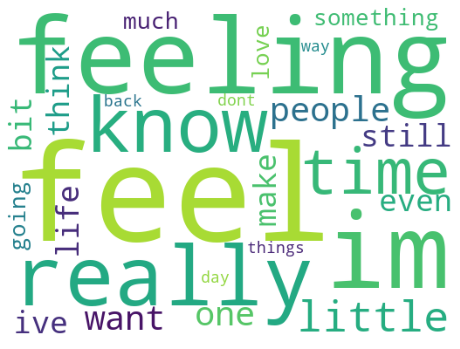

In [38]:
plt.subplots(figsize=(8,8))

x = subsample(labels, 30)
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wourdcloud.png')

plt.show()

In [39]:
fig = go.Figure()
fig = go.Figure(data=[go.Histogram(x=dfk.Emotion, name='words count'), 
                      go.Histogram(x=dfk.Emotion, cumulative_enabled=True, name='cumulative words count')],
               layout ={
                   'title':'Emotions Histogram',
                   'xaxis_title_text': 'Emotions',
                   'yaxis_title_text': 'Count',
                   'paper_bgcolor':'rgb(22,26,40)',
                   'plot_bgcolor':'rgb(22,26,40)',
                   'font_color':'white'
               })

fig.show()


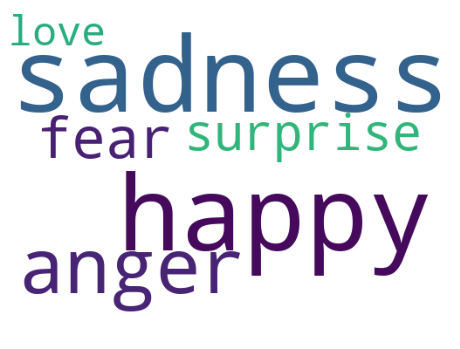

In [40]:
plt.subplots(figsize=(8,8))

x= subsample(dfk.Emotion, 5000)
wordcloud = WordCloud(background_color='white',
                      width=512,
                      height=384,
                      max_words = len(dfk.Emotion.unique())
                     ).generate(" ".join(x))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('wourdcloud-emotions.png')

plt.show()

In [41]:
fig = go.Figure(data=[go.Pie(labels=dfk.Emotion.unique(),
                             values=dfk.groupby('Emotion').Text.nunique(), 
                             textinfo='label+percent',
                            )],
                layout ={
                   'title':'Emotions Répartition',
                   'paper_bgcolor':'rgb(22,26,40)',
                   'plot_bgcolor':'rgb(22,26,40)',
                   'font_color':'white'
               })
fig.show()

## 3. Modélisation sur le premier jeu de donnés
### 3.1. Définition des piplines

In [17]:
pipe0 = Pipeline([
    ('vect', CountVectorizer()),
    ('sgd', SGDClassifier()),
])
pipe1 = Pipeline([
    ('vect', CountVectorizer()),
    ('lin_svm', LinearSVC(max_iter = 3000)),
])
Nneighbors=3
pipe2 = Pipeline([
    ('vect', CountVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=Nneighbors)),
]) 
pipe3 = Pipeline([
    ('vect', CountVectorizer()),
    ('lgr', LogisticRegression(max_iter = 3000, solver='sag')),
])
pipe4 = Pipeline([
    ('vect', CountVectorizer()),
    ('dtc', DecisionTreeClassifier()),
])

A l'aide de ces Pipelines je vais comparer les différents algos avec le même pré-traitement.

### 3.1. Définition des fonctions utiles

In [18]:
def run_pipes(pipes, splits, corpus, targets, test_size=0.2, seed=42):  
    res = defaultdict(list)
    spliter = ShuffleSplit(n_splits=splits, test_size=test_size, random_state=seed)
    for idx_train, idx_test in spliter.split(corpus, targets):
        for pipe in pipes:
            # name of the model
            name = "-".join([x[0] for x in pipe.steps])
            
            # extract datasets
            X_train = corpus[idx_train]
            X_test = corpus[idx_test]
            y_train = targets[idx_train]
            y_test = targets[idx_test]
            
            # Learn
            start = time()
            pipe.fit(X_train, y_train)
            fit_time = time() - start
            
            # predict and save results
            y = pipe.predict(X_test)
            res[name].append([
                fit_time,
                f1_score(y_test, y, average='micro'),
                f1_score(y_test, y, average='macro'),
                f1_score(y_test, y, average='weighted'),           
                f1_score(y_test, y, labels = [1], average = None),           
                f1_score(y_test, y, labels = [2], average = None),           
                f1_score(y_test, y, labels = [3], average = None),           
                f1_score(y_test, y, labels = [4], average = None),           
                f1_score(y_test, y, labels = [5], average = None),           
                f1_score(y_test, y, labels = [6], average = None),
            ])
    return res



In [ ]:
def print_table(res):
    # Compute mean and std
    final = {}
    for model in res:
        arr = np.array(res[model])
        final[model] = {
            "time (s)" : arr[:, 0].mean(),#.round(2),
            "f1_av_micro": [arr[:,1].mean().round(3), arr[:,1].std().round(3)],
            "f1_av_macro": [arr[:,2].mean().round(3), arr[:,2].std().round(3)],
            "f1_av_weighted": [arr[:,3].mean().round(3), arr[:,3].std().round(3)],
            "f1_"+emotk[0]: [arr[:,4].mean().round(3), arr[:,4].std().round(3)],
            "f1_"+emotk[1]: [arr[:,5].mean().round(3), arr[:,5].std().round(3)],
            "f1_"+emotk[2]: [arr[:,6].mean().round(3), arr[:,6].std().round(3)],
            "f1_"+emotk[3]: [arr[:,7].mean().round(3), arr[:,7].std().round(3)],
            "f1_"+emotk[4]: [arr[:,8].mean().round(3), arr[:,8].std().round(3)],
            "f1_"+emotk[5]: [arr[:,9].mean().round(3), arr[:,9].std().round(3)],
        }

    df = pd.DataFrame.from_dict(final, orient="index").round(3)
    return df

### Premiers test : vectorization + models

In [20]:
# run base pipes
res = run_pipes([pipe0, pipe1, pipe2, pipe3, pipe4], splits=10, corpus=corpusk, targets=targetsk)

In [21]:
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)     f1_av_micro     f1_av_macro  f1_av_weighted  \
vect-sgd         0.910  [0.888, 0.006]   [0.85, 0.007]  [0.888, 0.006]   
vect-lin_svm     5.161  [0.881, 0.006]  [0.844, 0.006]  [0.881, 0.006]   
vect-knn         0.430   [0.39, 0.006]  [0.282, 0.008]  [0.366, 0.007]   
vect-lgr        13.156  [0.884, 0.006]  [0.845, 0.008]  [0.883, 0.006]   
vect-dtc         4.232  [0.849, 0.005]  [0.816, 0.006]  [0.849, 0.006]   

                      f1_sadness            f1_anger             f1_love  \
vect-sgd      [[0.922], [0.007]]   [[0.88], [0.008]]   [[0.79], [0.019]]   
vect-lin_svm  [[0.918], [0.008]]  [[0.875], [0.008]]  [[0.776], [0.014]]   
vect-knn      [[0.481], [0.005]]  [[0.277], [0.014]]  [[0.164], [0.026]]   
vect-lgr       [[0.92], [0.006]]   [[0.872], [0.01]]   [[0.781], [0.02]]   
vect-dtc      [[0.876], [0.006]]  [[0.838], [0.011]]  [[0.749], [0.023]]   

                     f1_surprise             f1_fear            f1_happy  
vect-sgd      [[0.748], [0.018]]  [[0.848], [0.011]]  [[0.914], [0.006]]  
vect-lin_svm   [[0.748], [0.02]]   [[0.839], [0.01]]  [[0.906], [0.006]]  
vect-knn      [[0.131], [0.021]]  [[0.202], [0.024]]  [[0.439], [0.014]]  
vect-lgr      [[0.741], [0.024]]  [[0.842], [0.011]]  [[0.912], [0.004]]  
vect-dtc      [[0.735], [0.014]]   [[0.818], [0.01]]  [[0.879], [0.008]]

### Choix du meilleur nombre de voisins pour le KNN

In [22]:
# Choix du meilleur knn
Nneighbors=2
pipe0 = Pipeline([
    ('vect', CountVectorizer()),
    ('knn2', KNeighborsClassifier(n_neighbors=Nneighbors)),
])
Nneighbors=3
pipe1 = Pipeline([
    ('vect', CountVectorizer()),
    ('knn3', KNeighborsClassifier(n_neighbors=Nneighbors)),
])
Nneighbors=4
pipe2 = Pipeline([
    ('vect', CountVectorizer()),
    ('knn4', KNeighborsClassifier(n_neighbors=Nneighbors)),
]) 
Nneighbors=5
pipe3 = Pipeline([
    ('vect', CountVectorizer()),
    ('knn5', KNeighborsClassifier(n_neighbors=Nneighbors)),
])
Nneighbors=6
pipe4 = Pipeline([
    ('vect', CountVectorizer()),
    ('knn6', KNeighborsClassifier(n_neighbors=Nneighbors)),
])
res = run_pipes([pipe0, pipe1, pipe2, pipe3, pipe4], splits=10, corpus=corpusk, targets=targetsk)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)     f1_av_micro     f1_av_macro  f1_av_weighted  \
vect-knn2     0.418  [0.353, 0.008]   [0.273, 0.01]   [0.331, 0.01]   
vect-knn3     0.416   [0.39, 0.006]  [0.282, 0.008]  [0.366, 0.007]   
vect-knn4     0.473  [0.398, 0.007]   [0.29, 0.008]  [0.375, 0.007]   
vect-knn5     0.407  [0.397, 0.011]   [0.291, 0.01]  [0.376, 0.012]   
vect-knn6     0.421    [0.4, 0.009]  [0.286, 0.009]   [0.376, 0.01]   

                   f1_sadness            f1_anger             f1_love  \
vect-knn2  [[0.487], [0.009]]   [[0.28], [0.014]]  [[0.207], [0.024]]   
vect-knn3  [[0.481], [0.005]]  [[0.277], [0.014]]  [[0.164], [0.026]]   
vect-knn4  [[0.483], [0.009]]   [[0.28], [0.013]]  [[0.171], [0.024]]   
vect-knn5  [[0.482], [0.012]]  [[0.283], [0.009]]  [[0.163], [0.023]]   
vect-knn6  [[0.485], [0.011]]  [[0.277], [0.017]]   [[0.143], [0.01]]   

                  f1_surprise             f1_fear            f1_happy  
vect-knn2  [[0.149], [0.027]]  [[0.202], [0.021]]  [[0.312], [0.017]]  
vect-knn3  [[0.131], [0.021]]  [[0.202], [0.024]]  [[0.439], [0.014]]  
vect-knn4  [[0.127], [0.023]]  [[0.229], [0.018]]  [[0.454], [0.009]]  
vect-knn5   [[0.142], [0.01]]  [[0.223], [0.024]]  [[0.456], [0.014]]  
vect-knn6  [[0.133], [0.017]]  [[0.217], [0.021]]  [[0.464], [0.013]]

Le meilleur knn est pour 4 voisins. Je sais que cet algo n'est pas très performant mais je vais pouvoir réellement voir l'influence des transformation du corpus sur les perfs de cet algo là.

### Second test Vectorisation + Stopwords + models

In [23]:
pipe0 = Pipeline([
    ('vect_stop', CountVectorizer(stop_words=stopwords)),
    ('sgd', SGDClassifier()),
])
pipe1 = Pipeline([
    ('vect_stop', CountVectorizer(stop_words=stopwords)),
    ('lin_svm', LinearSVC(max_iter = 3000)),
])
Nneighbors=4
pipe2 = Pipeline([
    ('vect_stop', CountVectorizer(stop_words=stopwords)),
    ('knn', KNeighborsClassifier(n_neighbors=Nneighbors)),
]) 
pipe3 = Pipeline([
    ('vect_stop', CountVectorizer(stop_words=stopwords)),
    ('lgr', LogisticRegression(max_iter = 3000, solver='sag')),
])
pipe4 = Pipeline([
    ('vect_stop', CountVectorizer(stop_words=stopwords)),
    ('dtc', DecisionTreeClassifier()),
])

res = run_pipes([pipe0, pipe1, pipe2, pipe3, pipe4], splits=10, corpus=corpusk, targets=targetsk)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)     f1_av_micro     f1_av_macro  f1_av_weighted  \
vect_stop-sgd         0.750   [0.89, 0.005]  [0.853, 0.008]   [0.89, 0.006]   
vect_stop-lin_svm     2.121  [0.884, 0.006]  [0.849, 0.007]  [0.884, 0.006]   
vect_stop-knn         0.449  [0.572, 0.008]  [0.494, 0.011]  [0.562, 0.008]   
vect_stop-lgr         6.804  [0.887, 0.005]  [0.848, 0.006]  [0.886, 0.005]   
vect_stop-dtc         3.854  [0.864, 0.004]  [0.832, 0.007]  [0.864, 0.004]   

                           f1_sadness            f1_anger             f1_love  \
vect_stop-sgd      [[0.925], [0.006]]  [[0.885], [0.008]]  [[0.784], [0.025]]   
vect_stop-lin_svm   [[0.92], [0.007]]  [[0.877], [0.007]]  [[0.782], [0.018]]   
vect_stop-knn      [[0.627], [0.011]]  [[0.492], [0.015]]  [[0.398], [0.033]]   
vect_stop-lgr       [[0.92], [0.008]]  [[0.875], [0.009]]  [[0.791], [0.018]]   
vect_stop-dtc      [[0.895], [0.004]]  [[0.856], [0.013]]  [[0.767], [0.018]]   

                          f1_surprise             f1_fear            f1_happy  
vect_stop-sgd      [[0.756], [0.027]]   [[0.849], [0.01]]  [[0.916], [0.004]]  
vect_stop-lin_svm    [[0.76], [0.02]]  [[0.844], [0.011]]  [[0.909], [0.006]]  
vect_stop-knn      [[0.349], [0.032]]  [[0.459], [0.014]]  [[0.637], [0.005]]  
vect_stop-lgr      [[0.743], [0.025]]  [[0.842], [0.009]]  [[0.915], [0.004]]  
vect_stop-dtc      [[0.754], [0.035]]  [[0.832], [0.008]]  [[0.888], [0.005]]

Le fait de supprimer les stopwords a une influence non négligeable sur les modèle peux performants, comme le knn en revanche ce n'est pas flagrant sur les autres.

### Prise en compte de la pondération des mots les plus fréquents dans le corpus : TFIDF

On va ensuite tester la transformation tfidf sur les donnée vectorisée

In [33]:
pipe5 = Pipeline([
    ('vect_stop', CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('sgd', SGDClassifier()),
])
pipe6 = Pipeline([
    ('vect_stop', CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('lin_svm', LinearSVC()),
])
Nneighbors=4
pipe7 = Pipeline([
    ('vect_stop', CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('knn', KNeighborsClassifier(n_neighbors=Nneighbors)),
]) 
pipe8 = Pipeline([
    ('vect_stop', CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('lgr', LogisticRegression(max_iter = 2000, solver='sag')),
])
pipe9 = Pipeline([
    ('vect_stop', CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('dtc', DecisionTreeClassifier()),
])

In [34]:
res = run_pipes([pipe5, pipe6, pipe7, pipe8, pipe9], splits=10, corpus=corpusk, targets=targetsk)

In [35]:
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)     f1_av_micro     f1_av_macro  \
vect_stop-tfidf-sgd         0.607  [0.893, 0.004]  [0.857, 0.005]   
vect_stop-tfidf-lin_svm     0.862  [0.891, 0.006]  [0.855, 0.009]   
vect_stop-tfidf-knn         0.413  [0.732, 0.023]  [0.673, 0.031]   
vect_stop-tfidf-lgr         0.825  [0.864, 0.006]  [0.808, 0.012]   
vect_stop-tfidf-dtc         5.253  [0.854, 0.004]  [0.823, 0.006]   

                         f1_av_weighted          f1_sadness  \
vect_stop-tfidf-sgd      [0.891, 0.004]  [[0.923], [0.004]]   
vect_stop-tfidf-lin_svm   [0.89, 0.006]  [[0.924], [0.007]]   
vect_stop-tfidf-knn       [0.73, 0.023]  [[0.784], [0.009]]   
vect_stop-tfidf-lgr       [0.86, 0.007]  [[0.908], [0.007]]   
vect_stop-tfidf-dtc      [0.854, 0.004]  [[0.886], [0.006]]   

                                   f1_anger             f1_love  \
vect_stop-tfidf-sgd      [[0.886], [0.007]]  [[0.794], [0.019]]   
vect_stop-tfidf-lin_svm  [[0.885], [0.007]]  [[0.787], [0.018]]   
vect_stop-tfidf-knn        [[0.67], [0.06]]    [[0.6], [0.049]]   
vect_stop-tfidf-lgr      [[0.846], [0.008]]  [[0.735], [0.025]]   
vect_stop-tfidf-dtc      [[0.843], [0.009]]  [[0.755], [0.017]]   

                                f1_surprise             f1_fear  \
vect_stop-tfidf-sgd      [[0.766], [0.017]]   [[0.855], [0.01]]   
vect_stop-tfidf-lin_svm  [[0.767], [0.028]]  [[0.853], [0.012]]   
vect_stop-tfidf-knn      [[0.519], [0.058]]  [[0.683], [0.022]]   
vect_stop-tfidf-lgr      [[0.651], [0.048]]  [[0.819], [0.006]]   
vect_stop-tfidf-dtc      [[0.748], [0.028]]  [[0.828], [0.005]]   

                                   f1_happy  
vect_stop-tfidf-sgd      [[0.917], [0.004]]  
vect_stop-tfidf-lin_svm  [[0.915], [0.005]]  
vect_stop-tfidf-knn      [[0.779], [0.017]]  
vect_stop-tfidf-lgr      [[0.892], [0.005]]  
vect_stop-tfidf-dtc      [[0.875], [0.004]]

Le gain n'est pas notable pour les modèle déjà très performant mais en revanche améliore clairement les résultats d'un modèle comme le knn qui avait des performances plus faibles.

### Test de plusieurs kernel pour le SVM

In [36]:
pipe12 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('svm', SVC(kernel='rbf')),
])
res = run_pipes([pipe12], splits=1, corpus=corpusk, targets=targetsk)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)  f1_av_micro   f1_av_macro f1_av_weighted  \
vect-svm    96.081  [0.84, 0.0]  [0.776, 0.0]   [0.834, 0.0]   

                f1_sadness          f1_anger           f1_love  \
vect-svm  [[0.893], [0.0]]  [[0.826], [0.0]]  [[0.676], [0.0]]   

               f1_surprise           f1_fear          f1_happy  
vect-svm  [[0.615], [0.0]]  [[0.782], [0.0]]  [[0.866], [0.0]]

C'est très long !!!
Le classifier SVM ne peux pas fonctionner en multi-thread pour diminuer le temps de calcul.

### Test de BaggingClassifier 
Je souhaite utiliser ce méta estimateur pour partager le set en plusieurs petit set et les lancer en multi-thread

In [40]:
nb_esti = 6
pipe12 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('svm_bagg', OneVsRestClassifier(BaggingClassifier(SVC(kernel='rbf'), max_samples=1.0 / nb_esti, n_estimators=nb_esti), n_jobs=3)),
])
res = run_pipes([pipe12], splits=1, corpus=corpusk, targets=targetsk)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)   f1_av_micro   f1_av_macro f1_av_weighted  \
vect-svm_bagg    18.013  [0.761, 0.0]  [0.662, 0.0]   [0.745, 0.0]   

                     f1_sadness          f1_anger           f1_love  \
vect-svm_bagg  [[0.835], [0.0]]  [[0.719], [0.0]]  [[0.537], [0.0]]   

                    f1_surprise           f1_fear          f1_happy  
vect-svm_bagg  [[0.428], [0.0]]  [[0.666], [0.0]]  [[0.789], [0.0]]

Diminution notable du temps de calcul mais perte non négligeable de performances car chaque classifier entreinés a moins de données pour s'entreiner. Cela peux être amélioré en prenant en compte le poids des classes

In [41]:
nb_esti = 6
pipe12 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('svm_bagg', OneVsRestClassifier(BaggingClassifier(SVC(kernel='rbf', class_weight = 'balanced'), max_samples=1.0 / nb_esti, n_estimators=nb_esti), n_jobs=3)),
])
res = run_pipes([pipe12], splits=1, corpus=corpusk, targets=targetsk)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)   f1_av_micro   f1_av_macro f1_av_weighted  \
vect-svm_bagg    18.802  [0.801, 0.0]  [0.737, 0.0]   [0.793, 0.0]   

                     f1_sadness          f1_anger           f1_love  \
vect-svm_bagg  [[0.858], [0.0]]  [[0.777], [0.0]]  [[0.665], [0.0]]   

                    f1_surprise           f1_fear          f1_happy  
vect-svm_bagg  [[0.582], [0.0]]  [[0.713], [0.0]]  [[0.827], [0.0]]

Légère amélioraion des perf mais toujours pas au niveau de du SVM classique, en revanche cela permet de faire tourner plusieurs SVM et de selctionner le kernel le plus performant

In [42]:
nb_esti = 9
pipe12 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('svm_lin_bagg', OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear'), max_samples=1.0 / nb_esti, n_estimators=nb_esti), n_jobs=3)),
])
pipe13 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('svm_rgf_bagg', OneVsRestClassifier(BaggingClassifier(SVC(kernel='rbf'), max_samples=1.0 / nb_esti, n_estimators=nb_esti), n_jobs=3)),
])
pipe14 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('svm_poly_bagg', OneVsRestClassifier(BaggingClassifier(SVC(kernel='poly'), max_samples=1.0 / nb_esti, n_estimators=nb_esti), n_jobs=3)),
])
pipe15 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('svm_sigm_bagg', OneVsRestClassifier(BaggingClassifier(SVC(kernel='sigmoid'), max_samples=1.0 / nb_esti, n_estimators=nb_esti), n_jobs=3)),
])
res = run_pipes([pipe12, pipe13, pipe14, pipe15], splits=1, corpus=corpusk, targets=targetsk) 
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)   f1_av_micro   f1_av_macro f1_av_weighted  \
vect-svm_lin_bagg      9.547  [0.872, 0.0]  [0.831, 0.0]    [0.87, 0.0]   
vect-svm_rgf_bagg     14.182  [0.705, 0.0]   [0.57, 0.0]   [0.677, 0.0]   
vect-svm_poly_bagg    13.925  [0.469, 0.0]  [0.204, 0.0]   [0.366, 0.0]   
vect-svm_sigm_bagg     7.914  [0.799, 0.0]  [0.731, 0.0]    [0.79, 0.0]   

                          f1_sadness          f1_anger           f1_love  \
vect-svm_lin_bagg   [[0.903], [0.0]]  [[0.856], [0.0]]  [[0.776], [0.0]]   
vect-svm_rgf_bagg    [[0.81], [0.0]]  [[0.592], [0.0]]  [[0.443], [0.0]]   
vect-svm_poly_bagg  [[0.588], [0.0]]  [[0.035], [0.0]]  [[0.006], [0.0]]   
vect-svm_sigm_bagg  [[0.852], [0.0]]  [[0.772], [0.0]]   [[0.62], [0.0]]   

                         f1_surprise           f1_fear          f1_happy  
vect-svm_lin_bagg   [[0.714], [0.0]]  [[0.833], [0.0]]  [[0.901], [0.0]]  
vect-svm_rgf_bagg   [[0.283], [0.0]]  [[0.546], [0.0]]  [[0.744], [0.0]]  
vect-svm_poly_bagg  [[0.012], [0.0]]  [[0.015], [0.0]]   [[0.57], [0.0]]  
vect-svm_sigm_bagg  [[0.584], [0.0]]  [[0.732], [0.0]]  [[0.829], [0.0]]

conclusion : Le Kernel linéaire permet d'obtenir les meilleurs résultats.

In [44]:
pipe13 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('MLP_prof5', MLPClassifier(max_iter = 10000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 6), random_state=1)), # max_iter = 1000, 
])
pipe14 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('MLP_prof6', MLPClassifier(max_iter = 10000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(6, 6), random_state=1)), # max_iter = 1000, 
])
pipe15 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('MLP_prof7', MLPClassifier(max_iter = 10000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(7, 6), random_state=1)), # max_iter = 1000, 
])
pipe16 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('MLP_prof8', MLPClassifier(max_iter = 10000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8, 6), random_state=1)), # max_iter = 1000, 
])
pipe17 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('MLP_prof9', MLPClassifier(max_iter = 10000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(9, 6), random_state=1)), # max_iter = 1000, 
])
pipe18 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('MLP_prof10', MLPClassifier(max_iter = 10000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 6), random_state=1)), # max_iter = 1000, 
])
pipe19 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('MLP_prof11', MLPClassifier(max_iter = 10000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(11, 6), random_state=1)), # max_iter = 1000, 
])
pipe20 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('MLP_prof12', MLPClassifier(max_iter = 10000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(12, 6), random_state=1)), # max_iter = 1000, 
])
pipe21 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('MLP_prof13', MLPClassifier(max_iter = 10000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(13, 6), random_state=1)), # max_iter = 1000, 
])
pipe22 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('MLP_prof14', MLPClassifier(max_iter = 10000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(14, 6), random_state=1)), # max_iter = 1000, 
])
res = run_pipes([pipe13, pipe14, pipe15, pipe16, pipe17, pipe18, pipe19, pipe20, pipe21, pipe22], splits=1, corpus=corpusk, targets=targetsk)
print_table(res)


/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)   f1_av_micro   f1_av_macro f1_av_weighted  \
vect-tfidf-MLP_prof5     36.530  [0.742, 0.0]  [0.659, 0.0]   [0.747, 0.0]   
vect-tfidf-MLP_prof6    103.293  [0.806, 0.0]  [0.757, 0.0]   [0.805, 0.0]   
vect-tfidf-MLP_prof7     75.367  [0.734, 0.0]  [0.624, 0.0]   [0.725, 0.0]   
vect-tfidf-MLP_prof8     32.185  [0.831, 0.0]  [0.789, 0.0]   [0.831, 0.0]   
vect-tfidf-MLP_prof9    145.083    [0.8, 0.0]  [0.702, 0.0]   [0.795, 0.0]   
vect-tfidf-MLP_prof10    81.438  [0.805, 0.0]  [0.719, 0.0]   [0.806, 0.0]   
vect-tfidf-MLP_prof11   390.142   [0.52, 0.0]  [0.339, 0.0]   [0.481, 0.0]   
vect-tfidf-MLP_prof12    57.737  [0.833, 0.0]  [0.786, 0.0]   [0.831, 0.0]   
vect-tfidf-MLP_prof13   128.466   [0.74, 0.0]  [0.637, 0.0]   [0.737, 0.0]   
vect-tfidf-MLP_prof14    82.380  [0.821, 0.0]  [0.771, 0.0]   [0.823, 0.0]   

                             f1_sadness          f1_anger           f1_love  \
vect-tfidf-MLP_prof5   [[0.823], [0.0]]   [[0.62], [0.0]]  [[0.452], [0.0]]   
vect-tfidf-MLP_prof6   [[0.833], [0.0]]  [[0.803], [0.0]]   [[0.69], [0.0]]   
vect-tfidf-MLP_prof7   [[0.797], [0.0]]  [[0.743], [0.0]]   [[0.23], [0.0]]   
vect-tfidf-MLP_prof8   [[0.872], [0.0]]  [[0.798], [0.0]]  [[0.754], [0.0]]   
vect-tfidf-MLP_prof9   [[0.848], [0.0]]   [[0.78], [0.0]]  [[0.665], [0.0]]   
vect-tfidf-MLP_prof10  [[0.864], [0.0]]  [[0.795], [0.0]]  [[0.642], [0.0]]   
vect-tfidf-MLP_prof11  [[0.813], [0.0]]  [[0.466], [0.0]]  [[0.262], [0.0]]   
vect-tfidf-MLP_prof12  [[0.885], [0.0]]  [[0.779], [0.0]]  [[0.695], [0.0]]   
vect-tfidf-MLP_prof13  [[0.807], [0.0]]  [[0.733], [0.0]]  [[0.414], [0.0]]   
vect-tfidf-MLP_prof14  [[0.856], [0.0]]  [[0.759], [0.0]]  [[0.734], [0.0]]   

                            f1_surprise           f1_fear          f1_happy  
vect-tfidf-MLP_prof5   [[0.488], [0.0]]  [[0.733], [0.0]]  [[0.839], [0.0]]  
vect-tfidf-MLP_prof6   [[0.608], [0.0]]  [[0.755], [0.0]]   [[0.85], [0.0]]  
vect-tfidf-MLP_prof7   [[0.472], [0.0]]  [[0.695], [0.0]]  [[0.806], [0.0]]  
vect-tfidf-MLP_prof8   [[0.687], [0.0]]  [[0.747], [0.0]]  [[0.875], [0.0]]  
vect-tfidf-MLP_prof9   [[0.284], [0.0]]  [[0.783], [0.0]]  [[0.851], [0.0]]  
vect-tfidf-MLP_prof10  [[0.383], [0.0]]  [[0.771], [0.0]]   [[0.86], [0.0]]  
vect-tfidf-MLP_prof11  [[0.021], [0.0]]    [[0.0], [0.0]]  [[0.473], [0.0]]  
vect-tfidf-MLP_prof12  [[0.702], [0.0]]  [[0.792], [0.0]]  [[0.867], [0.0]]  
vect-tfidf-MLP_prof13  [[0.435], [0.0]]  [[0.587], [0.0]]  [[0.844], [0.0]]  
vect-tfidf-MLP_prof14  [[0.632], [0.0]]  [[0.752], [0.0]]  [[0.892], [0.0]]

In [34]:
pipe13 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('tfidf', TfidfTransformer()),
    ('MLP_prof12', MLPClassifier(max_iter = 3000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(12, 6), random_state=1)), # max_iter = 1000, 
])
res = run_pipes([pipe13], splits=1, corpus=corpusk, targets=targetsk) 
print_table(res)

time (s)  ...          f1_happy
vect-tfidf-MLP_prof12      51.8  ...  [[0.847], [0.0]]

[1 rows x 10 columns]

## Utilisation de NLTK pour le preprocessing - Lemmatize or/and Stemmize
J'ai essayé de faire une classe pour utiliser tout le préprocessing de nltk mais ne fonctionnant pas je l'ai enlevé lors du netoyage du notebook. De toute facon j'y revient dans le notebook sur le deuxième jeu de données.

## Ajout de N-gramms

In [45]:
pipe19= Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('sgd', SGDClassifier(max_iter=5000, tol=1e-4)),
])
pipe20= Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('sgd', SGDClassifier(max_iter=5000, tol=1e-4)),
])

res = run_pipes([pipe19, pipe20], splits = 10, corpus=corpusk, targets=targetsk)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)     f1_av_micro     f1_av_macro  \
ngram_stop-tfidf-sgd     1.326  [0.904, 0.003]   [0.87, 0.004]   
ngram_stop-sgd           1.463    [0.9, 0.003]  [0.866, 0.004]   

                      f1_av_weighted          f1_sadness            f1_anger  \
ngram_stop-tfidf-sgd  [0.903, 0.003]  [[0.935], [0.005]]  [[0.899], [0.006]]   
ngram_stop-sgd          [0.9, 0.003]  [[0.934], [0.004]]  [[0.895], [0.008]]   

                                 f1_love        f1_surprise  \
ngram_stop-tfidf-sgd  [[0.807], [0.017]]  [[0.78], [0.018]]   
ngram_stop-sgd        [[0.801], [0.017]]  [[0.777], [0.02]]   

                                 f1_fear            f1_happy  
ngram_stop-tfidf-sgd  [[0.872], [0.008]]  [[0.926], [0.003]]  
ngram_stop-sgd        [[0.866], [0.006]]  [[0.922], [0.004]]

l'ajout de n-grams permet de gagnet encore 1% sur le f1 score weighted
### Test of Naive Bayes classification methods

In [46]:
pipe21 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('mult_nb', MultinomialNB()),
])
pipe22 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('compl_nb', ComplementNB()),
])
pipe23 = Pipeline([
    ('vect', CountVectorizer(stop_words=stopwords)),
    ('bern_nb', BernoulliNB()),
])

res = run_pipes([pipe21, pipe22, pipe23], splits = 10, corpus=corpusk, targets=targetsk)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)     f1_av_micro     f1_av_macro  f1_av_weighted  \
vect-mult_nb      0.415  [0.778, 0.006]   [0.638, 0.01]  [0.754, 0.008]   
vect-compl_nb     0.423  [0.879, 0.003]  [0.845, 0.005]  [0.878, 0.003]   
vect-bern_nb      0.419  [0.658, 0.006]   [0.39, 0.007]   [0.58, 0.007]   

                       f1_sadness            f1_anger             f1_love  \
vect-mult_nb   [[0.832], [0.007]]  [[0.752], [0.013]]   [[0.445], [0.03]]   
vect-compl_nb  [[0.912], [0.004]]    [[0.87], [0.01]]  [[0.779], [0.024]]   
vect-bern_nb    [[0.746], [0.01]]  [[0.423], [0.024]]  [[0.052], [0.016]]   

                      f1_surprise             f1_fear            f1_happy  
vect-mult_nb   [[0.264], [0.031]]  [[0.699], [0.015]]  [[0.838], [0.004]]  
vect-compl_nb  [[0.766], [0.013]]  [[0.837], [0.012]]  [[0.903], [0.003]]  
vect-bern_nb   [[0.001], [0.003]]  [[0.333], [0.023]]  [[0.787], [0.006]]

In [47]:
pipe24 = Pipeline([
    ("ngram", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('compl_nb', ComplementNB()),
])

In [48]:
res = run_pipes([pipe24], splits = 10, corpus=corpusk, targets=targetsk)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)     f1_av_micro     f1_av_macro  f1_av_weighted  \
ngram-compl_nb     0.798  [0.899, 0.002]  [0.866, 0.005]  [0.899, 0.002]   

                       f1_sadness            f1_anger             f1_love  \
ngram-compl_nb  [[0.93], [0.003]]  [[0.893], [0.006]]  [[0.808], [0.018]]   

                       f1_surprise             f1_fear            f1_happy  
ngram-compl_nb  [[0.779], [0.027]]  [[0.864], [0.008]]  [[0.921], [0.003]]

Le classifier utilisant l'algo Complement Naive Bayes présente des meilleurs score que certains de ceux que j'avais retenus, j'ai donc décidé de le garder pour la suite.

## Equilibrage du jeu de données

J'ai remarqué lors de l'analyse des données que certaines emotions était moins bien représentés, autrement dit le jeu de données est mal équilibré. On retrouve cette information lorsqu'on regarde le f1-score average macro (moyenne brute des f1 score de chaque classes) et f1 score average weighted ( moyenne pondéré). J'en conclu qu'en multi-classes il est utile de regarder ces deux infos, tant que le f1 score macro est plus bas que le score weighted cela signifie que l'on peux gagner en performance de prédiction en équilibrant les classes.

In [49]:

pipe25 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('sgd-weight_bal', SGDClassifier(class_weight = 'balanced')),
])
pipe26 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('lin_svm-weight_bal', LinearSVC(class_weight = 'balanced')),
])
pipe28 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('lgr-weight_bal', LogisticRegression(max_iter = 2000, solver='sag', class_weight = 'balanced')),
])
pipe29 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('dtc-weight_bal', DecisionTreeClassifier(class_weight = 'balanced')),
])
pipe30 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('compl_nb-weight_bal', ComplementNB()),
])
res = run_pipes([pipe25, pipe26, pipe28, pipe29, pipe30], splits = 10, corpus=corpusk, targets=targetsk)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)     f1_av_micro  \
ngram_stop-tfidf-sgd-weight_bal          0.957  [0.902, 0.003]   
ngram_stop-tfidf-lin_svm-weight_bal      1.342  [0.905, 0.004]   
ngram_stop-tfidf-lgr-weight_bal          2.072  [0.894, 0.004]   
ngram_stop-tfidf-dtc-weight_bal          6.916  [0.849, 0.005]   
ngram_stop-tfidf-compl_nb-weight_bal     0.726  [0.899, 0.003]   

                                         f1_av_macro  f1_av_weighted  \
ngram_stop-tfidf-sgd-weight_bal       [0.871, 0.004]  [0.904, 0.003]   
ngram_stop-tfidf-lin_svm-weight_bal   [0.873, 0.005]  [0.905, 0.004]   
ngram_stop-tfidf-lgr-weight_bal       [0.864, 0.004]  [0.896, 0.004]   
ngram_stop-tfidf-dtc-weight_bal       [0.824, 0.006]   [0.85, 0.004]   
ngram_stop-tfidf-compl_nb-weight_bal  [0.864, 0.006]  [0.898, 0.003]   

                                              f1_sadness            f1_anger  \
ngram_stop-tfidf-sgd-weight_bal       [[0.937], [0.004]]  [[0.902], [0.007]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.937], [0.005]]  [[0.902], [0.007]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.928], [0.007]]  [[0.889], [0.008]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.878], [0.009]]   [[0.84], [0.009]]   
ngram_stop-tfidf-compl_nb-weight_bal   [[0.93], [0.003]]  [[0.896], [0.008]]   

                                                 f1_love         f1_surprise  \
ngram_stop-tfidf-sgd-weight_bal       [[0.823], [0.008]]   [[0.771], [0.02]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.818], [0.016]]  [[0.784], [0.023]]   
ngram_stop-tfidf-lgr-weight_bal        [[0.824], [0.01]]  [[0.774], [0.016]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.768], [0.015]]  [[0.761], [0.023]]   
ngram_stop-tfidf-compl_nb-weight_bal   [[0.801], [0.02]]  [[0.773], [0.033]]   

                                                 f1_fear            f1_happy  
ngram_stop-tfidf-sgd-weight_bal       [[0.866], [0.007]]  [[0.924], [0.004]]  
ngram_stop-tfidf-lin_svm-weight_bal   [[0.871], [0.009]]  [[0.926], [0.003]]  
ngram_stop-tfidf-lgr-weight_bal       [[0.856], [0.005]]  [[0.916], [0.006]]  
ngram_stop-tfidf-dtc-weight_bal       [[0.825], [0.009]]   [[0.87], [0.004]]  
ngram_stop-tfidf-compl_nb-weight_bal  [[0.864], [0.008]]   [[0.92], [0.004]]

In [50]:

pipe31 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('rand_fo-weight_bal', RandomForestClassifier(min_samples_leaf=5, class_weight = 'balanced')),
])
res = run_pipes([pipe31], splits = 10, corpus=corpusk, targets=targetsk)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)     f1_av_micro     f1_av_macro  \
ngram_stop-tfidf-rand_fo-weight_bal     5.052  [0.865, 0.004]  [0.834, 0.005]   

                                     f1_av_weighted          f1_sadness  \
ngram_stop-tfidf-rand_fo-weight_bal  [0.868, 0.004]  [[0.902], [0.007]]   

                                              f1_anger           f1_love  \
ngram_stop-tfidf-rand_fo-weight_bal  [[0.851], [0.01]]  [[0.8], [0.007]]   

                                            f1_surprise             f1_fear  \
ngram_stop-tfidf-rand_fo-weight_bal  [[0.724], [0.021]]  [[0.837], [0.007]]   

                                               f1_happy  
ngram_stop-tfidf-rand_fo-weight_bal  [[0.891], [0.005]]

In [51]:
(unique, counts) = np.unique(targetsk, return_counts=True)
frequencies = np.asarray((emotk[unique-1], counts)).T
print("fréquences après échantillonnage : ", frequencies)


fréquences après échantillonnage :  [['sadness' 6265]
 ['anger' 2993]
 ['love' 1641]
 ['surprise' 879]
 ['fear' 2652]
 ['happy' 7029]]


In [52]:
from imblearn.under_sampling import RandomUnderSampler
#resampl_dic = {1 : 2650, 2 : 2650, 3 : 2650, 4 : 1641, 5 : 2650, 6: 879}
rus = RandomUnderSampler(random_state=42, sampling_strategy="not minority") # 'majority', 'not minority', 'not majority', 'all', 'auto': équivalent à .'not minority'
corpusk_rsampl, targetsk_rsampl = rus.fit_resample(dfk.Text.values.reshape(-1, 1), targetsk)
#corpusk_rsampl, targetsk_rsampl = rus.fit_resample(corpusk_rsampl, targetsk_rsampl)
corpusk_rsampl = pd.DataFrame(corpusk_rsampl, columns=['corpusk_rsampl']).corpusk_rsampl


(unique, counts) = np.unique(targetsk_rsampl, return_counts=True)
frequencies = np.asarray((emotk[unique-1], counts)).T
print("fréquences après échantillonnage : ", frequencies)

fréquences après échantillonnage :  [['sadness' 879]
 ['anger' 879]
 ['love' 879]
 ['surprise' 879]
 ['fear' 879]
 ['happy' 879]]


In [53]:
pipe25 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('sgd-weight_bal', SGDClassifier()),
])
pipe26 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('lin_svm-weight_bal', LinearSVC()), 
])                                                                                                                 
pipe28 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('lgr-weight_bal', LogisticRegression(max_iter = 2000, solver='sag')),
])
pipe29 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('dtc-weight_bal', DecisionTreeClassifier()),
])
pipe30 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('compl_nb-weight_bal', ComplementNB()),
])
res = run_pipes([pipe25, pipe26, pipe28, pipe29, pipe30], splits = 10, corpus=corpusk_rsampl, targets=targetsk_rsampl)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)     f1_av_micro  \
ngram_stop-tfidf-sgd-weight_bal          0.226  [0.862, 0.009]   
ngram_stop-tfidf-lin_svm-weight_bal      0.254  [0.868, 0.009]   
ngram_stop-tfidf-lgr-weight_bal          0.240  [0.849, 0.006]   
ngram_stop-tfidf-dtc-weight_bal          0.720  [0.756, 0.021]   
ngram_stop-tfidf-compl_nb-weight_bal     0.180  [0.873, 0.008]   

                                         f1_av_macro  f1_av_weighted  \
ngram_stop-tfidf-sgd-weight_bal       [0.862, 0.009]   [0.861, 0.01]   
ngram_stop-tfidf-lin_svm-weight_bal   [0.867, 0.008]  [0.867, 0.009]   
ngram_stop-tfidf-lgr-weight_bal       [0.849, 0.006]  [0.848, 0.006]   
ngram_stop-tfidf-dtc-weight_bal       [0.756, 0.018]  [0.756, 0.019]   
ngram_stop-tfidf-compl_nb-weight_bal  [0.871, 0.008]  [0.871, 0.008]   

                                              f1_sadness            f1_anger  \
ngram_stop-tfidf-sgd-weight_bal       [[0.847], [0.015]]  [[0.862], [0.018]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.856], [0.013]]  [[0.866], [0.016]]   
ngram_stop-tfidf-lgr-weight_bal        [[0.817], [0.01]]  [[0.856], [0.015]]   
ngram_stop-tfidf-dtc-weight_bal          [[0.6], [0.04]]  [[0.776], [0.024]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.864], [0.011]]  [[0.878], [0.019]]   

                                                 f1_love         f1_surprise  \
ngram_stop-tfidf-sgd-weight_bal       [[0.911], [0.012]]  [[0.898], [0.011]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.912], [0.012]]  [[0.906], [0.014]]   
ngram_stop-tfidf-lgr-weight_bal       [[0.891], [0.013]]  [[0.904], [0.012]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.898], [0.011]]   [[0.89], [0.016]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.901], [0.015]]  [[0.897], [0.011]]   

                                                 f1_fear            f1_happy  
ngram_stop-tfidf-sgd-weight_bal       [[0.845], [0.015]]  [[0.807], [0.022]]  
ngram_stop-tfidf-lin_svm-weight_bal    [[0.847], [0.02]]  [[0.816], [0.022]]  
ngram_stop-tfidf-lgr-weight_bal        [[0.832], [0.02]]  [[0.792], [0.016]]  
ngram_stop-tfidf-dtc-weight_bal       [[0.813], [0.034]]  [[0.562], [0.039]]  
ngram_stop-tfidf-compl_nb-weight_bal  [[0.864], [0.016]]  [[0.825], [0.017]]

Avec un échantillonage des classe avant entreinement des modèles, on pert étonnament ent performance, il vaut mieusx compenser  dans le modèle avec un poid sur les classes

In [54]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, sampling_strategy="majority") # 'majority', 'not minority', 'not majority', 'all', 'auto': équivalent à .'not minority'
corpusk_rsampl, targetsk_rsampl = rus.fit_resample(dfk.Text.values.reshape(-1, 1), targetsk)
#corpusk_rsampl, targetsk_rsampl = rus.fit_resample(corpusk_rsampl, targetsk_rsampl)
corpusk_rsampl = pd.DataFrame(corpusk_rsampl, columns=['corpusk_rsampl']).corpusk_rsampl


(unique, counts) = np.unique(targetsk_rsampl, return_counts=True)
frequencies = np.asarray((emotk[unique-1], counts)).T
print("fréquences après échantillonnage : ", frequencies)

fréquences après échantillonnage :  [['sadness' 6265]
 ['anger' 2993]
 ['love' 1641]
 ['surprise' 879]
 ['fear' 2652]
 ['happy' 879]]


In [55]:
pipe25 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('sgd-weight_bal', SGDClassifier(class_weight = 'balanced')),
])
pipe26 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('lin_svm-weight_bal', LinearSVC(class_weight = 'balanced')),
])                                                                                                                  
pipe28 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('lgr-weight_bal', LogisticRegression(max_iter = 2000, solver='sag', class_weight = 'balanced')),
])
pipe29 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('dtc-weight_bal', DecisionTreeClassifier(class_weight = 'balanced')),
])
pipe30 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('compl_nb-weight_bal', ComplementNB()),
])
res = run_pipes([pipe25, pipe26, pipe28, pipe29, pipe30], splits = 10, corpus=corpusk_rsampl, targets=targetsk_rsampl)
print_table(res)

/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



time (s)     f1_av_micro  \
ngram_stop-tfidf-sgd-weight_bal          0.620  [0.906, 0.003]   
ngram_stop-tfidf-lin_svm-weight_bal      0.799  [0.909, 0.003]   
ngram_stop-tfidf-lgr-weight_bal          0.929  [0.896, 0.004]   
ngram_stop-tfidf-dtc-weight_bal          3.724  [0.837, 0.006]   
ngram_stop-tfidf-compl_nb-weight_bal     0.474  [0.901, 0.005]   

                                         f1_av_macro  f1_av_weighted  \
ngram_stop-tfidf-sgd-weight_bal       [0.882, 0.004]  [0.906, 0.003]   
ngram_stop-tfidf-lin_svm-weight_bal   [0.884, 0.003]  [0.909, 0.004]   
ngram_stop-tfidf-lgr-weight_bal        [0.87, 0.005]  [0.896, 0.004]   
ngram_stop-tfidf-dtc-weight_bal       [0.798, 0.008]  [0.837, 0.007]   
ngram_stop-tfidf-compl_nb-weight_bal  [0.868, 0.006]  [0.899, 0.006]   

                                              f1_sadness            f1_anger  \
ngram_stop-tfidf-sgd-weight_bal       [[0.939], [0.004]]  [[0.903], [0.006]]   
ngram_stop-tfidf-lin_svm-weight_bal    [[0.94], [0.005]]  [[0.905], [0.005]]   
ngram_stop-tfidf-lgr-weight_bal        [[0.93], [0.005]]  [[0.892], [0.005]]   
ngram_stop-tfidf-dtc-weight_bal       [[0.866], [0.009]]  [[0.847], [0.006]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.933], [0.005]]  [[0.899], [0.006]]   

                                                 f1_love         f1_surprise  \
ngram_stop-tfidf-sgd-weight_bal       [[0.935], [0.008]]  [[0.824], [0.017]]   
ngram_stop-tfidf-lin_svm-weight_bal   [[0.938], [0.009]]  [[0.828], [0.016]]   
ngram_stop-tfidf-lgr-weight_bal        [[0.928], [0.01]]  [[0.818], [0.019]]   
ngram_stop-tfidf-dtc-weight_bal        [[0.89], [0.013]]  [[0.811], [0.011]]   
ngram_stop-tfidf-compl_nb-weight_bal  [[0.929], [0.006]]   [[0.816], [0.02]]   

                                                 f1_fear            f1_happy  
ngram_stop-tfidf-sgd-weight_bal       [[0.871], [0.008]]   [[0.82], [0.016]]  
ngram_stop-tfidf-lin_svm-weight_bal   [[0.878], [0.009]]  [[0.815], [0.013]]  
ngram_stop-tfidf-lgr-weight_bal       [[0.861], [0.013]]  [[0.793], [0.014]]  
ngram_stop-tfidf-dtc-weight_bal       [[0.832], [0.011]]  [[0.542], [0.037]]  
ngram_stop-tfidf-compl_nb-weight_bal  [[0.874], [0.011]]  [[0.759], [0.027]]

### Optimisation des algorithmes et Sauvegarde des pipes

In [56]:

pipe25 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('sgd-weight_bal', SGDClassifier(max_iter = 2000, class_weight = 'balanced', penalty= 'elasticnet', loss = 'modified_huber')), #penalty{‘l2’, ‘l1’, ‘elasticnet’}
])                          # loss  ‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’, or a regression loss: ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’.
pipe26 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('lin_svm-weight_bal', LinearSVC(class_weight = 'balanced', penalty='l1', loss = 'squared_hinge', dual=False)), # penalty{‘l1’, ‘l2’}: default : 'l2', loss{‘hinge’, ‘squared_hinge’} : default: 'square_hinge'
])                                                                                                                  # must : , penalty='l1', loss = 'squared_hinge', dual=False
pipe28 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('lgr-weight_bal', LogisticRegression(max_iter = 2000, penalty = 'l1', solver='liblinear', class_weight = 'balanced')), # penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, dualbool, default=False
])                                                                                      # solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
pipe29 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('dtc-weight_bal', DecisionTreeClassifier(class_weight = 'balanced')),
])
pipe30 = Pipeline([
    ("ngram_stop", CountVectorizer(stop_words=stopwords, ngram_range=(1,2), min_df=2)),
    ('tfidf', TfidfTransformer()),
    ('compl_nb-weight_bal', ComplementNB()),
])


res = run_pipes([pipe25, pipe26, pipe28, pipe29, pipe30], splits = 10, corpus=corpusk_rsampl, targets=targetsk_rsampl)
print_table(res)

## sauvegarde
import pickle
filename = "pipes_models.pickle"
pickle.dump([pipe25, pipe26, pipe28, pipe29, pipe30], open(filename, 'wb'))



/home/anthony/anaconda3/envs/plotly/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



### Utilisation des models sauvegardée pour évaluation complete des modèles

In [42]:
import pickle
filename = "pipes_models.pickle"
pipes = pickle.load(open(filename, 'rb'))

In [43]:
#from sklearn.model_selection import train_test_split
#xtrain, xtest, ytrain, ytest = train_test_split(df_vector.values, targets, test_size=0.2, random_state=42)
y= pipes[0].predict(corpusk)
f1_score(targetsk, y, average='weighted')

0.9151731899097759

In [44]:
res=defaultdict(list)
for pipe in pipes:
    # name of the model
    name = "-".join([x[0] for x in pipe.steps])

    # predict and save results
    y = pipe.predict(corpusk)
    res[name].append([
        pipe.steps[2][0],
        f1_score(targetsk, y, average='micro'),
        f1_score(targetsk, y, average='macro'),
        f1_score(targetsk, y, average='weighted'),
        precision_score(targetsk, y, average='weighted'), 
        recall_score(targetsk, y, average='weighted'),
    ])


In [45]:
def print_table_res(res):
    # Compute mean and std
    final = {}
    i=0
    for model in res:
        final[model] = {
            "name":res[model][0][0],
            "f1_av_micro (%)": res[model][0][1].round(3)*100,
            "f1_av_macro (%)": res[model][0][2].round(3)*100,
            "f1_av_weighted (%)": res[model][0][3].round(3)*100,
            "prec_av_weighted (%)": res[model][0][3].round(3)*100,
            "recall_av_weighted (%)": res[model][0][3].round(3)*100,
        }

    df = pd.DataFrame.from_dict(final, orient="index").round(3)
    return df
df_res = print_table_res(res)
df_res


name  f1_av_micro (%)  \
ngram_stop-tfidf-sgd-weight_bal            sgd-weight_bal             91.6   
ngram_stop-tfidf-lin_svm-weight_bal    lin_svm-weight_bal             91.3   
ngram_stop-tfidf-lgr-weight_bal            lgr-weight_bal             87.7   
ngram_stop-tfidf-dtc-weight_bal            dtc-weight_bal             83.9   
ngram_stop-tfidf-compl_nb-weight_bal  compl_nb-weight_bal             86.7   

                                      f1_av_macro (%)  f1_av_weighted (%)  \
ngram_stop-tfidf-sgd-weight_bal                  91.3                91.5   
ngram_stop-tfidf-lin_svm-weight_bal              90.9                91.3   
ngram_stop-tfidf-lgr-weight_bal                  86.7                87.8   
ngram_stop-tfidf-dtc-weight_bal                  86.8                83.0   
ngram_stop-tfidf-compl_nb-weight_bal             86.3                86.3   

                                      prec_av_weighted (%)  \
ngram_stop-tfidf-sgd-weight_bal                       91.5   
ngram_stop-tfidf-lin_svm-weight_bal                   91.3   
ngram_stop-tfidf-lgr-weight_bal                       87.8   
ngram_stop-tfidf-dtc-weight_bal                       83.0   
ngram_stop-tfidf-compl_nb-weight_bal                  86.3   

                                      recall_av_weighted (%)  
ngram_stop-tfidf-sgd-weight_bal                         91.5  
ngram_stop-tfidf-lin_svm-weight_bal                     91.3  
ngram_stop-tfidf-lgr-weight_bal                         87.8  
ngram_stop-tfidf-dtc-weight_bal                         83.0  
ngram_stop-tfidf-compl_nb-weight_bal                    86.3

In [46]:
y= pipes[0].predict(corpusk)
score = pipes[0].score(corpusk, targetsk)

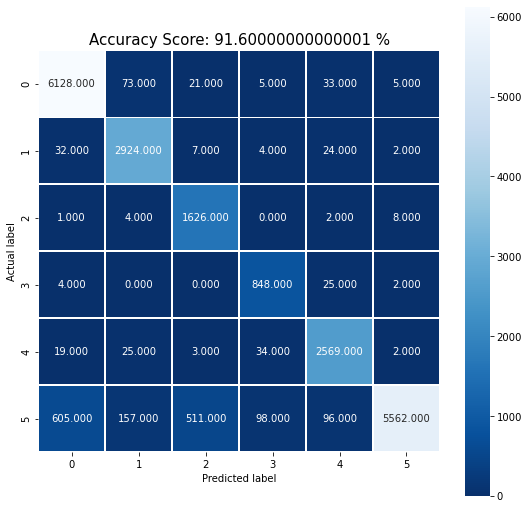

In [47]:
from sklearn import metrics

cm = metrics.confusion_matrix(targetsk, y)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0} %'.format(round(score,3)*100)
plt.title(all_sample_title, size = 15);

In [53]:
fig = go.Figure(data=[go.Heatmap(
                   z=cm,
                   x=emotk,
                   y=emotk,
                   colorscale="Viridis",
                   hovertemplate = "<b>Predicted :</b> %{x} <br>"+"<b>Real :</b> %{y} <br>"
                                    "<b>Count :</b> %{z} <br>"
                            + "<extra></extra>")],
                layout ={
                   'title':'Correlation Matrix',
                   'xaxis_title_text': 'Predicted label',
                   'yaxis_title_text': 'Actual label',
                   'paper_bgcolor':'rgb(22,26,40)',
                   'plot_bgcolor':'rgb(22,26,40)',
                   'font_color':'white'
               })
fig.show()

La seule classe faisant baisser les scores et qui sort du lot est happy. C'est pourtant une des classe les plus représentée. On remarque entre 1300 et 1400 mauvaises predictions : 
* happy -> predicted love, ce qui peux paraitre logique en terme de vocabulaire utilisé pour exprimer ces sentiments.
* happy -> predicted sadness, plus surprenant!

## ROC Curves, AUC Curves

In [23]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score


model = pipes[0]
y_scores = model.predict_proba(corpusk)
y_onehot = pd.get_dummies(targetsk, columns=model.classes_)


## ROC ##
fig1 = go.Figure()
fig1.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(y_scores.shape[1]):
    y_true = y_onehot.iloc[:, i]
    y_score = y_scores[:, i]

    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_score = roc_auc_score(y_true, y_score)

    name = f"{emotk[y_onehot.columns[i]-1]} (AUC={auc_score:.2f})"
    fig1.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

fig1.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=500)
fig1.show()


## Precision fcn of Recall
fig2 = go.Figure()
fig2.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=1, y1=0
)

for i in range(y_scores.shape[1]):
    y_true = y_onehot.iloc[:, i]
    y_score = y_scores[:, i]

    precision, recall, _ = precision_recall_curve(y_true, y_score)
    auc_score = average_precision_score(y_true, y_score)

    name = f"{emotk[y_onehot.columns[i]-1]} (AP={auc_score:.2f})"
    fig2.add_trace(go.Scatter(x=recall, y=precision, name=name, mode='lines'))

fig2.update_layout(
    xaxis_title='Recall',
    yaxis_title='Precision',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=500
)
fig2.show()

Les courbes sont tracées pour un seul modèle, le SGD.<br>
le critère AUC (aire sous la courbe ROC) est trè élevé quelque soit le sentiment à prédire (pratiquement 1, legère baisse pour happy). Les modèle donne une très bonne précision et recall queque soit le seuil de probabilité utilisé pour prédire l'appartenance à une classe.<br>
